In [1]:
from reconstruction import reconstruct_volume_gpu
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
import os
import glob
import h5py

In [2]:
pn_rec = r"Y:/hpc/r/lfm2025/recordings"
includes = ['']
excludes = []

recs = [os.path.basename(rec) for rec in sorted(glob.glob(os.path.expanduser(os.path.join(pn_rec, '*'))), reverse=True) if os.path.exists(os.path.join(pn_rec, rec, 'psf.h5'))]
recs = [rec for rec in recs if all([s in rec for s in includes]) and not any([s in rec for s in excludes])]
print('\n'.join(recs))

20250425_1537_PSF_LB_redFB_1-10000_2d_without_coverslip_4
20250425_1457_PSF_LB_redFB_1-10000_2d_without_coverslip_x100_1
20250425_1415_PSF_LB_redFB_1-10000_2d_without_coverslip_y100_1
20250425_1320_PSF_LB_redFB_1-10000_2d_without_coverslip_3
20250425_1242_PSF_LB_redFB_1-10000_2d_without_coverslip_2
20250425_1217_PSF_LB_redFB_1-10000_2d_without_coverslip_1
20250425_1138_PSF_LB_background
20250412_1700_LB_redFB_1-10000_3d_with coverslip_1
20250412_1656_LB_redFB_1-5000_3d_with coverslip_2
20250412_1654_LB_redFB_1-5000_3d_with coverslip_1
20250412_1651_LB_redFB_1-1000_3d_with coverslip_2
20250412_1649_LB_redFB_1-1000_3d_with coverslip_1
20250412_1604_PSF_LB_redFB_1-5000_withcoverslip_1
20250412_1539_PSF_LB_redFB_1-1000_withcoverslip_2
20250412_1513_PSF_LB_redFB_1-1000_withcoverslip_1


In [3]:
pn_rec = r"Y:/hpc/r/lfm2025/recordings"
dataset_name = "20250425_1320_PSF_LB_redFB_1-10000_2d_without_coverslip_3"
fn = os.path.join(pn_rec, dataset_name, 'psf.h5')
with h5py.File(fn, 'r') as f:
    # print(f.keys())
    psf = np.array(f['psf'])
    psf_filtered = np.array(f["psf_clean"])
    # psf_params = f["psf_cleaning_params"]

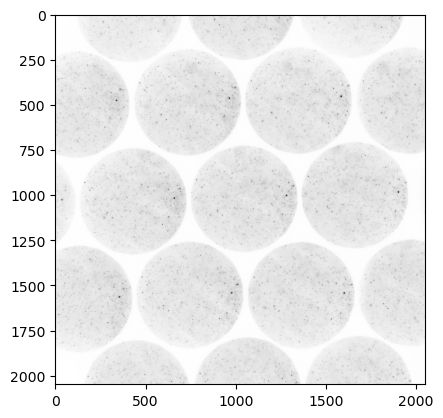

In [4]:
dataset_name = "20250412_1651_LB_redFB_1-1000_3d_with coverslip_2"
fn = os.path.join(pn_rec, dataset_name, 'psf.h5')
with h5py.File(fn, 'r') as f:
    imgs = np.array(f["psf"])
img = imgs[2,:,:]
plt.imshow(img, cmap='binary')

Initializing memory
Finished initializing memory


Main loop:   0%|          | 0/30 [00:00<?, ?it/s]

Forward Projection:   0%|          | 0/160 [00:00<?, ?it/s]

Back Projection:   0%|          | 0/160 [00:00<?, ?it/s]

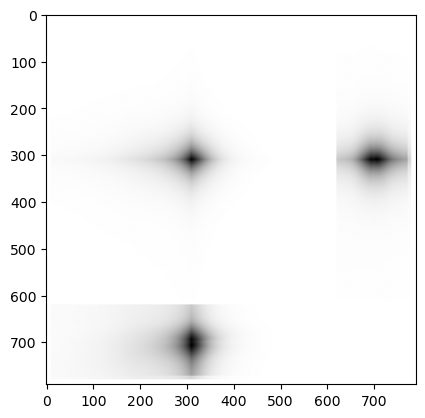

In [6]:
for z in range(psf.shape[0]):
    psf[z,:,:] = psf[z,:,:]/psf[z,:,:].sum()
vol, loss, mip = reconstruct_volume_gpu(img,psf, plot=True)

In [11]:
psf.shape

(160, 2048, 2048)